In [1]:
import pandas as pd
import re
from pathlib import Path
import matplotlib.pyplot as plt
from sqlglot import column
#from torch.backends.cudnn import deterministic

third_party = pd.read_csv('Kuda_ISW_Third_Party.csv')
backend = pd.read_csv('Kuda_ISW_Backend.csv')



In [2]:
third_party 

,id,transaction_date,value_date,transaction_type,amount,amount_currency,balance,balance_currency,matching_reference,reporting_tag,...,updated,fsp_accounts,fsp_transaction_ids,backend_accounts,backend_transaction_ids,other_accounts,other_transaction_ids,metadata,tags,description
0,384904780,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:29:19.000000 UTC,C,15300.0,NGN,0.0,NGN,[199@2044RBXA24081708291915300.00],CardPayments,...,2024-08-19 10:30:57.667504 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RBXA|240817082919
1,384904781,2024-08-17 00:00:00.000000 UTC,2024-08-17 09:32:53.000000 UTC,C,10000.0,NGN,0.0,NGN,[199@2044RCGR24081709325310000.00],CardPayments,...,2024-08-19 10:30:57.667504 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGR|240817093253
2,384904789,2024-08-17 00:00:00.000000 UTC,2024-08-17 12:53:08.000000 UTC,C,2000.0,NGN,0.0,NGN,[199@2044RCGJ2408171253082000.00],CardPayments,...,2024-08-19 10:30:57.667504 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGJ|240817125308
3,384904790,2024-08-17 00:00:00.000000 UTC,2024-08-17 10:28:46.000000 UTC,C,51500.0,NGN,0.0,NGN,[199@2044RCHA24081710284651500.00],CardPayments,...,2024-08-19 10:30:57.667504 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCHA|240817102846
4,384904795,2024-08-17 00:00:00.000000 UTC,2024-08-17 14:12:18.000000 UTC,C,5000.0,NGN,0.0,NGN,[199@2044RCKG2408171412185000.00],CardPayments,...,2024-08-19 10:30:57.667504 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Default, Amount_Impact=-500...",[CardPayments],Goods and services|2044RCKG|240817141218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,384916794,2024-08-17 00:00:00.000000 UTC,2024-08-17 11:45:40.000000 UTC,C,1900.0,NGN,0.0,NGN,[199@2044RCMN2408171145401900.00],CardPayments,...,2024-08-19 10:56:08.000000 UTC,NaN,NaN,[827],[330084405],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCMN|240817114540
28368,384924216,2024-08-17 00:00:00.000000 UTC,2024-08-17 15:06:03.000000 UTC,C,15100.0,NGN,0.0,NGN,[199@2044RCGB24081715060315100.00],CardPayments,...,2024-08-19 10:56:08.000000 UTC,NaN,NaN,[827],[330045430],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGB|240817150603
28369,384912451,2024-08-17 00:00:00.000000 UTC,2024-08-17 11:41:18.000000 UTC,C,1020.0,NGN,0.0,NGN,[199@2044RCMA2408171141181020.00],CardPayments,...,2024-08-19 10:56:08.000000 UTC,NaN,NaN,[827],[330085441],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCMA|240817114118
28370,384930889,2024-08-17 00:00:00.000000 UTC,2024-08-17 21:54:28.000000 UTC,C,3000.0,NGN,0.0,NGN,[199@2044RCJZ2408172154283000.00],CardPayments,...,2024-08-19 10:56:08.000000 UTC,NaN,NaN,[827],[329979849],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCJZ|240817215428


In [3]:
backend

,id,transaction_date,value_date,transaction_type,amount,amount_currency,balance,balance_currency,matching_reference,reporting_tag,...,updated,fsp_accounts,fsp_transaction_ids,backend_accounts,backend_transaction_ids,other_accounts,other_transaction_ids,metadata,tags,description
0,330048362,2024-08-17 00:00:00.000000 UTC,2024-08-17 03:42:24.000000 UTC,D,1050.0,NGN,0.0,NGN,[199@2044RCCJ2408171501101050.00],CardPayments,...,2024-08-19 10:56:08.000000 UTC,NaN,NaN,NaN,NaN,[1321],[384692937],"{transaction_date=2024-08-17 03:42:24, Instrum...",[CardPayments],D|2024-08-17_2044rccj_240817150110374509|24081...
1,330104929,2024-08-17 00:00:00.000000 UTC,2024-08-17 10:17:57.000000 UTC,D,18300.0,NGN,0.0,NGN,[199@2044RCKM24081710175118300.00],CardPayments,...,2024-08-19 10:56:08.000000 UTC,NaN,NaN,NaN,NaN,[1321],[384670450],"{transaction_date=2024-08-17 10:17:57, Instrum...",[CardPayments],D|2024-08-17_2044rckm_240817101751245792|24081...
2,330106283,2024-08-17 00:00:00.000000 UTC,2024-08-17 10:12:08.000000 UTC,D,25400.0,NGN,0.0,NGN,[199@2044RBZZ24081710120525400.00],CardPayments,...,2024-08-19 10:56:08.000000 UTC,NaN,NaN,NaN,NaN,[1322],[384905085],"{transaction_date=2024-08-17 10:12:08, Instrum...",[CardPayments],D|2024-08-17_2044rbzz_240817101205243116|24081...
3,329988271,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:37:14.000000 UTC,D,3500.0,NGN,0.0,NGN,[199@2044RBZU2408172037103500.00],CardPayments,...,2024-08-19 10:56:08.000000 UTC,NaN,NaN,NaN,NaN,[1322],[385013735],"{transaction_date=2024-08-17 08:37:14, Instrum...",[CardPayments],D|2024-08-17_2044rbzu_240817203710539090|24081...
4,330107818,2024-08-17 00:00:00.000000 UTC,2024-08-17 10:05:27.000000 UTC,D,10100.0,NGN,0.0,NGN,[199@2044RBXL24081710052210100.00],CardPayments,...,2024-08-19 10:56:08.000000 UTC,NaN,NaN,NaN,NaN,[1322],[384992501],"{transaction_date=2024-08-17 10:05:27, Instrum...",[CardPayments],D|2024-08-17_2044rbxl_240817100522240104|24081...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161579,329988061,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:38:48.000000 UTC,D,5000.0,NGN,0.0,NGN,[199@2044RCAA2408172038415000.00],CardPayments,...,2024-08-19 10:13:29.415816 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-08-17 08:38:48, Instrum...",[CardPayments],D|2024-08-17_2044rcaa_240817203841539618|24081...
161580,329988063,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:38:46.000000 UTC,D,3500.0,NGN,0.0,NGN,[199@2044RBWS2408172038453500.00],CardPayments,...,2024-08-19 10:13:29.415816 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-08-17 08:38:46, Instrum...",[CardPayments],D|2024-08-17_2044rbws_240817203845539614|24081...
161581,329988064,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:38:46.000000 UTC,D,2100.0,NGN,0.0,NGN,[199@2044RCPK2408172038432100.00],CardPayments,...,2024-08-19 10:13:29.415816 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-08-17 08:38:46, Instrum...",[CardPayments],D|2024-08-17_2044rcpk_240817203843539612|24081...
161582,329988069,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:38:44.000000 UTC,D,700.0,NGN,0.0,NGN,[199@2044RCKJ240817203842700.00],CardPayments,...,2024-08-19 10:13:29.415816 UTC,NaN,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-08-17 08:38:44, Instrum...",[CardPayments],D|2024-08-17_2044rckj_240817203842539604|24081...


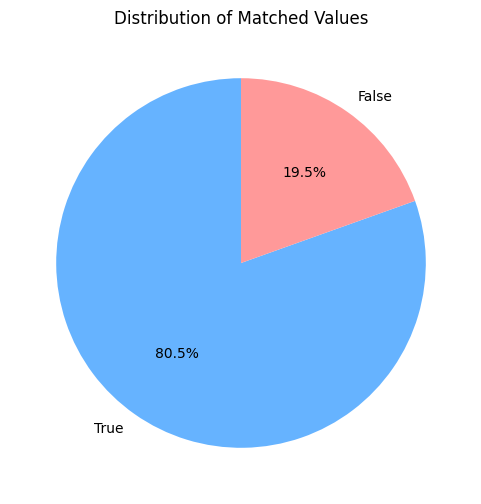

matched
True     22828
False     5544
Name: count, dtype: int64

In [4]:
# PLOT
matched_counts = third_party['matched'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    matched_counts,
    labels=matched_counts.index.map({True: 'True', False: 'False'}),
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff9999'],
    startangle=90
)
plt.title('Distribution of Matched Values')
plt.show()
matched_counts

In [5]:
def extract_terminal_and_rrn(df):
    # Split the 'description' column by '|'
    split_data = df['description'].str.split('|', expand=True)
    
    # Ensure that the split data has enough columns
    if split_data.shape[1] > 2:
        # Extract and assign the terminal_id and rrn to new columns
        df['terminal_id'] = split_data[1]
        df['rrn'] = split_data[2]
    else:
        # Handle cases where split data doesn't have enough columns
        df['terminal_id'] = None
        df['rrn'] = None
    
    return df

# Apply the function
third_party = extract_terminal_and_rrn(third_party)
third_party


,id,transaction_date,value_date,transaction_type,amount,amount_currency,balance,balance_currency,matching_reference,reporting_tag,...,fsp_transaction_ids,backend_accounts,backend_transaction_ids,other_accounts,other_transaction_ids,metadata,tags,description,terminal_id,rrn
0,384904780,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:29:19.000000 UTC,C,15300.0,NGN,0.0,NGN,[199@2044RBXA24081708291915300.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RBXA|240817082919,2044RBXA,240817082919
1,384904781,2024-08-17 00:00:00.000000 UTC,2024-08-17 09:32:53.000000 UTC,C,10000.0,NGN,0.0,NGN,[199@2044RCGR24081709325310000.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGR|240817093253,2044RCGR,240817093253
2,384904789,2024-08-17 00:00:00.000000 UTC,2024-08-17 12:53:08.000000 UTC,C,2000.0,NGN,0.0,NGN,[199@2044RCGJ2408171253082000.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGJ|240817125308,2044RCGJ,240817125308
3,384904790,2024-08-17 00:00:00.000000 UTC,2024-08-17 10:28:46.000000 UTC,C,51500.0,NGN,0.0,NGN,[199@2044RCHA24081710284651500.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCHA|240817102846,2044RCHA,240817102846
4,384904795,2024-08-17 00:00:00.000000 UTC,2024-08-17 14:12:18.000000 UTC,C,5000.0,NGN,0.0,NGN,[199@2044RCKG2408171412185000.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Default, Amount_Impact=-500...",[CardPayments],Goods and services|2044RCKG|240817141218,2044RCKG,240817141218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,384916794,2024-08-17 00:00:00.000000 UTC,2024-08-17 11:45:40.000000 UTC,C,1900.0,NGN,0.0,NGN,[199@2044RCMN2408171145401900.00],CardPayments,...,NaN,[827],[330084405],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCMN|240817114540,2044RCMN,240817114540
28368,384924216,2024-08-17 00:00:00.000000 UTC,2024-08-17 15:06:03.000000 UTC,C,15100.0,NGN,0.0,NGN,[199@2044RCGB24081715060315100.00],CardPayments,...,NaN,[827],[330045430],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGB|240817150603,2044RCGB,240817150603
28369,384912451,2024-08-17 00:00:00.000000 UTC,2024-08-17 11:41:18.000000 UTC,C,1020.0,NGN,0.0,NGN,[199@2044RCMA2408171141181020.00],CardPayments,...,NaN,[827],[330085441],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCMA|240817114118,2044RCMA,240817114118
28370,384930889,2024-08-17 00:00:00.000000 UTC,2024-08-17 21:54:28.000000 UTC,C,3000.0,NGN,0.0,NGN,[199@2044RCJZ2408172154283000.00],CardPayments,...,NaN,[827],[329979849],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCJZ|240817215428,2044RCJZ,240817215428


In [6]:
def extract_terminal_and_rrn(df):
  
    # Split the 'description' column by '|'
    split_data = df['description'].str.split('|', expand=True)

    # Debug: Print the first few rows of split_data to verify the split
    print("Sample split_data:")
    print(split_data.head())

    # Ensure that the split data has enough columns
    if split_data.shape[1] > 2:
        # Extract and assign the terminal_id and rrn to new columns
        df['terminal_id'] = split_data[1].str.lower()
        df['rrn'] = split_data[2]
    else:
        # Handle cases where split data doesn't have enough columns
        df['terminal_id'] = None
        df['rrn'] = None
        print("Warning: Some 'description' values do not have the expected format.")
    
    return df

# Apply the function
third_party = extract_terminal_and_rrn(third_party)
third_party


Sample split_data:
                    0         1             2
0  Goods and services  2044RBXA  240817082919
1  Goods and services  2044RCGR  240817093253
2  Goods and services  2044RCGJ  240817125308
3  Goods and services  2044RCHA  240817102846
4  Goods and services  2044RCKG  240817141218


,id,transaction_date,value_date,transaction_type,amount,amount_currency,balance,balance_currency,matching_reference,reporting_tag,...,fsp_transaction_ids,backend_accounts,backend_transaction_ids,other_accounts,other_transaction_ids,metadata,tags,description,terminal_id,rrn
0,384904780,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:29:19.000000 UTC,C,15300.0,NGN,0.0,NGN,[199@2044RBXA24081708291915300.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RBXA|240817082919,2044rbxa,240817082919
1,384904781,2024-08-17 00:00:00.000000 UTC,2024-08-17 09:32:53.000000 UTC,C,10000.0,NGN,0.0,NGN,[199@2044RCGR24081709325310000.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGR|240817093253,2044rcgr,240817093253
2,384904789,2024-08-17 00:00:00.000000 UTC,2024-08-17 12:53:08.000000 UTC,C,2000.0,NGN,0.0,NGN,[199@2044RCGJ2408171253082000.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGJ|240817125308,2044rcgj,240817125308
3,384904790,2024-08-17 00:00:00.000000 UTC,2024-08-17 10:28:46.000000 UTC,C,51500.0,NGN,0.0,NGN,[199@2044RCHA24081710284651500.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCHA|240817102846,2044rcha,240817102846
4,384904795,2024-08-17 00:00:00.000000 UTC,2024-08-17 14:12:18.000000 UTC,C,5000.0,NGN,0.0,NGN,[199@2044RCKG2408171412185000.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Default, Amount_Impact=-500...",[CardPayments],Goods and services|2044RCKG|240817141218,2044rckg,240817141218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,384916794,2024-08-17 00:00:00.000000 UTC,2024-08-17 11:45:40.000000 UTC,C,1900.0,NGN,0.0,NGN,[199@2044RCMN2408171145401900.00],CardPayments,...,NaN,[827],[330084405],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCMN|240817114540,2044rcmn,240817114540
28368,384924216,2024-08-17 00:00:00.000000 UTC,2024-08-17 15:06:03.000000 UTC,C,15100.0,NGN,0.0,NGN,[199@2044RCGB24081715060315100.00],CardPayments,...,NaN,[827],[330045430],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGB|240817150603,2044rcgb,240817150603
28369,384912451,2024-08-17 00:00:00.000000 UTC,2024-08-17 11:41:18.000000 UTC,C,1020.0,NGN,0.0,NGN,[199@2044RCMA2408171141181020.00],CardPayments,...,NaN,[827],[330085441],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCMA|240817114118,2044rcma,240817114118
28370,384930889,2024-08-17 00:00:00.000000 UTC,2024-08-17 21:54:28.000000 UTC,C,3000.0,NGN,0.0,NGN,[199@2044RCJZ2408172154283000.00],CardPayments,...,NaN,[827],[329979849],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCJZ|240817215428,2044rcjz,240817215428


In [7]:
# Define the columns you want to select

columns_select = ['id', 'amount','value_date', 'terminal_id', 'rrn']

# Select the desired columns from the DataFrame
third_party = third_party[columns_select]
third_party

,id,amount,value_date,terminal_id,rrn
0,384904780,15300.0,2024-08-17 08:29:19.000000 UTC,2044rbxa,240817082919
1,384904781,10000.0,2024-08-17 09:32:53.000000 UTC,2044rcgr,240817093253
2,384904789,2000.0,2024-08-17 12:53:08.000000 UTC,2044rcgj,240817125308
3,384904790,51500.0,2024-08-17 10:28:46.000000 UTC,2044rcha,240817102846
4,384904795,5000.0,2024-08-17 14:12:18.000000 UTC,2044rckg,240817141218
...,...,...,...,...,...
28367,384916794,1900.0,2024-08-17 11:45:40.000000 UTC,2044rcmn,240817114540
28368,384924216,15100.0,2024-08-17 15:06:03.000000 UTC,2044rcgb,240817150603
28369,384912451,1020.0,2024-08-17 11:41:18.000000 UTC,2044rcma,240817114118
28370,384930889,3000.0,2024-08-17 21:54:28.000000 UTC,2044rcjz,240817215428


In [8]:
def extract_metadata_values(df):
    # Define regex patterns for tid and rrn
    tid_pattern = re.compile(r'tid=([^,}]+)')
    rrn_pattern = re.compile(r'rrn=([^,}]+)')
    
    # Extract tid and rrn using regex and create new columns
    df['terminal_id'] = df['metadata'].apply(lambda x: tid_pattern.search(x).group(1) if tid_pattern.search(x) else None)
    df['rrn'] = df['metadata'].apply(lambda x: rrn_pattern.search(x).group(1) if rrn_pattern.search(x) else None)
    
    return df

# Apply the function to extract values
backend = extract_metadata_values(backend)
backend

,id,transaction_date,value_date,transaction_type,amount,amount_currency,balance,balance_currency,matching_reference,reporting_tag,...,fsp_transaction_ids,backend_accounts,backend_transaction_ids,other_accounts,other_transaction_ids,metadata,tags,description,terminal_id,rrn
0,330048362,2024-08-17 00:00:00.000000 UTC,2024-08-17 03:42:24.000000 UTC,D,1050.0,NGN,0.0,NGN,[199@2044RCCJ2408171501101050.00],CardPayments,...,NaN,NaN,NaN,[1321],[384692937],"{transaction_date=2024-08-17 03:42:24, Instrum...",[CardPayments],D|2024-08-17_2044rccj_240817150110374509|24081...,2044rccj,240817150110
1,330104929,2024-08-17 00:00:00.000000 UTC,2024-08-17 10:17:57.000000 UTC,D,18300.0,NGN,0.0,NGN,[199@2044RCKM24081710175118300.00],CardPayments,...,NaN,NaN,NaN,[1321],[384670450],"{transaction_date=2024-08-17 10:17:57, Instrum...",[CardPayments],D|2024-08-17_2044rckm_240817101751245792|24081...,2044rckm,240817101751
2,330106283,2024-08-17 00:00:00.000000 UTC,2024-08-17 10:12:08.000000 UTC,D,25400.0,NGN,0.0,NGN,[199@2044RBZZ24081710120525400.00],CardPayments,...,NaN,NaN,NaN,[1322],[384905085],"{transaction_date=2024-08-17 10:12:08, Instrum...",[CardPayments],D|2024-08-17_2044rbzz_240817101205243116|24081...,2044rbzz,240817101205
3,329988271,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:37:14.000000 UTC,D,3500.0,NGN,0.0,NGN,[199@2044RBZU2408172037103500.00],CardPayments,...,NaN,NaN,NaN,[1322],[385013735],"{transaction_date=2024-08-17 08:37:14, Instrum...",[CardPayments],D|2024-08-17_2044rbzu_240817203710539090|24081...,2044rbzu,240817203710
4,330107818,2024-08-17 00:00:00.000000 UTC,2024-08-17 10:05:27.000000 UTC,D,10100.0,NGN,0.0,NGN,[199@2044RBXL24081710052210100.00],CardPayments,...,NaN,NaN,NaN,[1322],[384992501],"{transaction_date=2024-08-17 10:05:27, Instrum...",[CardPayments],D|2024-08-17_2044rbxl_240817100522240104|24081...,2044rbxl,240817100522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161579,329988061,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:38:48.000000 UTC,D,5000.0,NGN,0.0,NGN,[199@2044RCAA2408172038415000.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-08-17 08:38:48, Instrum...",[CardPayments],D|2024-08-17_2044rcaa_240817203841539618|24081...,2044rcaa,240817203841
161580,329988063,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:38:46.000000 UTC,D,3500.0,NGN,0.0,NGN,[199@2044RBWS2408172038453500.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-08-17 08:38:46, Instrum...",[CardPayments],D|2024-08-17_2044rbws_240817203845539614|24081...,2044rbws,240817203845
161581,329988064,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:38:46.000000 UTC,D,2100.0,NGN,0.0,NGN,[199@2044RCPK2408172038432100.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-08-17 08:38:46, Instrum...",[CardPayments],D|2024-08-17_2044rcpk_240817203843539612|24081...,2044rcpk,240817203843
161582,329988069,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:38:44.000000 UTC,D,700.0,NGN,0.0,NGN,[199@2044RCKJ240817203842700.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-08-17 08:38:44, Instrum...",[CardPayments],D|2024-08-17_2044rckj_240817203842539604|24081...,2044rckj,240817203842


In [9]:
# Define the columns you want to select
columns_select = ['id', 'amount','value_date', 'terminal_id', 'rrn']

# Select the desired columns from the DataFrame
backend = backend[columns_select]
backend

,id,amount,value_date,terminal_id,rrn
0,330048362,1050.0,2024-08-17 03:42:24.000000 UTC,2044rccj,240817150110
1,330104929,18300.0,2024-08-17 10:17:57.000000 UTC,2044rckm,240817101751
2,330106283,25400.0,2024-08-17 10:12:08.000000 UTC,2044rbzz,240817101205
3,329988271,3500.0,2024-08-17 08:37:14.000000 UTC,2044rbzu,240817203710
4,330107818,10100.0,2024-08-17 10:05:27.000000 UTC,2044rbxl,240817100522
...,...,...,...,...,...
161579,329988061,5000.0,2024-08-17 08:38:48.000000 UTC,2044rcaa,240817203841
161580,329988063,3500.0,2024-08-17 08:38:46.000000 UTC,2044rbws,240817203845
161581,329988064,2100.0,2024-08-17 08:38:46.000000 UTC,2044rcpk,240817203843
161582,329988069,700.0,2024-08-17 08:38:44.000000 UTC,2044rckj,240817203842


In [10]:
# sort index
third_party =third_party.rename(columns={"id":"unique_id"})
backend = backend.rename(columns={"id":"unique_id"})

backend

,unique_id,amount,value_date,terminal_id,rrn
0,330048362,1050.0,2024-08-17 03:42:24.000000 UTC,2044rccj,240817150110
1,330104929,18300.0,2024-08-17 10:17:57.000000 UTC,2044rckm,240817101751
2,330106283,25400.0,2024-08-17 10:12:08.000000 UTC,2044rbzz,240817101205
3,329988271,3500.0,2024-08-17 08:37:14.000000 UTC,2044rbzu,240817203710
4,330107818,10100.0,2024-08-17 10:05:27.000000 UTC,2044rbxl,240817100522
...,...,...,...,...,...
161579,329988061,5000.0,2024-08-17 08:38:48.000000 UTC,2044rcaa,240817203841
161580,329988063,3500.0,2024-08-17 08:38:46.000000 UTC,2044rbws,240817203845
161581,329988064,2100.0,2024-08-17 08:38:46.000000 UTC,2044rcpk,240817203843
161582,329988069,700.0,2024-08-17 08:38:44.000000 UTC,2044rckj,240817203842


In [11]:
## split backend into 2

split_df = len(backend)//2

backend1 = backend[:split_df].iloc[:split_df]
backend2 = backend[split_df:].iloc[split_df:]

print(backend1)
print(backend2)


       unique_id   amount                      value_date terminal_id  \
0      330048362   1050.0  2024-08-17 03:42:24.000000 UTC    2044rccj   
1      330104929  18300.0  2024-08-17 10:17:57.000000 UTC    2044rckm   
2      330106283  25400.0  2024-08-17 10:12:08.000000 UTC    2044rbzz   
3      329988271   3500.0  2024-08-17 08:37:14.000000 UTC    2044rbzu   
4      330107818  10100.0  2024-08-17 10:05:27.000000 UTC    2044rbxl   
...          ...      ...                             ...         ...   
80787  330086884   5200.0  2024-08-17 11:34:57.000000 UTC    2044rcfh   
80788  330007199   5000.0  2024-08-17 06:49:00.000000 UTC    2044rcnb   
80789  329990771   5000.0  2024-08-17 08:20:49.000000 UTC    2044rbwp   
80790  329984636    500.0  2024-08-17 09:05:15.000000 UTC    2044rcft   
80791  330081124   6910.0  2024-08-17 11:59:47.000000 UTC    2044rcgw   

                rrn  
0      240817150110  
1      240817101751  
2      240817101205  
3      240817203710  
4      240817

In [12]:
from splink import DuckDBAPI, block_on
from splink.blocking_analysis import n_largest_blocks

from splink.blocking_analysis import count_comparisons_from_blocking_rule
db_api = DuckDBAPI()

from splink.blocking_analysis import (
    cumulative_comparisons_to_be_scored_from_blocking_rules_chart,
)
from jellyfish import levenshtein_distance # Import levenshtein_distance

from splink.blocking_analysis import (
    cumulative_comparisons_to_be_scored_from_blocking_rules_chart,
)

blocking_rules_for_analysis = [
    block_on("amount"),
    block_on("rrn"),
    block_on("terminal_id")

]


cumulative_comparisons_to_be_scored_from_blocking_rules_chart(
    table_or_tables=[third_party,backend1],
    blocking_rules=blocking_rules_for_analysis,
    db_api=db_api,
    link_type="link_only",
)

alt.Chart(...)

In [13]:
from splink.exploratory import completeness_chart

completeness_chart(
    [third_party, backend],
    cols=["amount", "rrn", "terminal_id"],
    db_api=DuckDBAPI(),
    table_names_for_chart=["third_party", "backend"],
)

alt.LayerChart(...)

In [14]:
## Estimating model parameters
from splink import Linker, SettingsCreator, block_on, DuckDBAPI
import splink.comparison_library as cl

settings = SettingsCreator(
    unique_id_column_name="unique_id",
    link_type="link_only",
    comparisons=[

        cl.NameComparison("terminal_id"),
        cl.NameComparison("rrn"),
        cl.ExactMatch("amount")  
    ],
    retain_intermediate_calculation_columns=True,
)
linker = Linker([third_party,backend1],settings,db_api=DuckDBAPI())

In [15]:
deterministic_rules = [
    "l.rrn = r.rrn and levenshtein(r.terminal_id, l.rrn) <=1",
    block_on("terminal_id","amount"),
]
linker.training.estimate_probability_two_random_records_match(deterministic_rules, recall=0.7)


Probability two random records match is estimated to be  6.31e-05.
This means that amongst all possible pairwise record comparisons, one in 15,841.42 are expected to match.  With 2,292,230,624 total possible comparisons, we expect a total of around 144,698.57 matching pairs


In [16]:
## estimate u probabilities
linker.training.estimate_u_using_random_sampling(max_pairs=1e8)


----- Estimating u probabilities using random sampling -----


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


Estimated u probabilities using random sampling

Your model is not yet fully trained. Missing estimates for:
    - terminal_id (no m values are trained).
    - rrn (no m values are trained).
    - amount (no m values are trained).


In [17]:
## Estimate m probabilities

#first pass
training_block_rule = block_on("terminal_id","amount")
training_session_true =(
    linker.training.estimate_parameters_using_expectation_maximisation(training_block_rule)
)


----- Starting EM training session -----

Estimating the m probabilities of the model by blocking on:
(l."terminal_id" = r."terminal_id") AND (l."amount" = r."amount")

Parameter estimates will be made for the following comparison(s):
    - rrn

Parameter estimates cannot be made for the following comparison(s) since they are used in the blocking rules: 
    - terminal_id
    - amount

Iteration 1: Largest change in params was -0.436 in probability_two_random_records_match
Iteration 2: Largest change in params was 0.0181 in the m_probability of rrn, level `Exact match on rrn`
Iteration 3: Largest change in params was 0.0101 in the m_probability of rrn, level `Exact match on rrn`
Iteration 4: Largest change in params was -0.00667 in the m_probability of rrn, level `Jaro-Winkler distance of rrn >= 0.92`
Iteration 5: Largest change in params was -0.00522 in the m_probability of rrn, level `Jaro-Winkler distance of rrn >= 0.92`
Iteration 6: Largest change in params was -0.00419 in the m_p

In [21]:
## Second pass
training_block_rule = block_on("rrn")
training_session_rrn =(
    linker.training.estimate_parameters_using_expectation_maximisation(training_block_rule)
)


----- Starting EM training session -----

Estimating the m probabilities of the model by blocking on:
l."rrn" = r."rrn"

Parameter estimates will be made for the following comparison(s):
    - terminal_id
    - amount

Parameter estimates cannot be made for the following comparison(s) since they are used in the blocking rules: 

Iteration 1: Largest change in params was -0.444 in probability_two_random_records_match
Iteration 2: Largest change in params was 0.0418 in the m_probability of terminal_id, level `Exact match on terminal_id`
Iteration 3: Largest change in params was 0.0149 in the m_probability of terminal_id, level `Exact match on terminal_id`
Iteration 4: Largest change in params was 0.0071 in the m_probability of terminal_id, level `Exact match on terminal_id`
Iteration 5: Largest change in params was 0.00408 in the m_probability of terminal_id, level `Exact match on terminal_id`
Iteration 6: Largest change in params was 0.00262 in the m_probability of terminal_id, level `

In [22]:
df_predictions = linker.inference.predict(threshold_match_probability=0.8)
df_predictions.as_pandas_dataframe()



SplinkException: Error executing the following sql for table `__splink__blocked_id_pairs`(__splink__blocked_id_pairs_3f908f975):
CREATE TABLE __splink__blocked_id_pairs_3f908f975 AS 
WITH

__splink__df_concat_with_tf as (
select * from __splink__df_concat_with_tf_2c5fa5a2b), 

__splink__df_concat_with_tf_left as (
        select * from __splink__df_concat_with_tf
        where source_dataset =
            (select min(source_dataset) from __splink__df_concat_with_tf)
        ), 

__splink__df_concat_with_tf_right as (
        select * from __splink__df_concat_with_tf
        where source_dataset =
            (select max(source_dataset) from __splink__df_concat_with_tf)
        ) 

            select
            '0' as match_key,
            l."source_dataset" || '-__-' || l."unique_id" as join_key_l,
            r."source_dataset" || '-__-' || r."unique_id" as join_key_r
            from __splink__df_concat_with_tf_left as l
            inner join __splink__df_concat_with_tf_right as r
            on
            (1=1)
             where 1=1 
            
            

Error was: Out of Memory Error: failed to offload data block of size 256.0 KiB (7.0 GiB/7.0 GiB used).
This limit was set by the 'max_temp_directory_size' setting.
By default, this setting utilizes the available disk space on the drive where the 'temp_directory' is located.
You can adjust this setting, by using (for example) PRAGMA max_temp_directory_size='10GiB'

In [ ]:
## Waterfall chart
records_to_view = df_predictions.as_record_dict(limit=50)
linker.visualisations.waterfall_chart(records_to_view, filter_nulls=False)


In [ ]:
match_predictions = df_predictions.as_pandas_dataframe()
match_predictions.columns